#📌 **Extracción**

In [1]:
import requests
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
respuesta = requests.get(url)
data = respuesta.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 📖 **Diccionario de datos**

- **customerID**: número de identificación único de cada cliente.

- **Churn**: si el cliente dejó o no la empresa.

- **gender**: género (masculino y femenino).

- **SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años.

- **Partner**: si el cliente tiene o no una pareja.

- **Dependents**: si el cliente tiene o no dependientes.

- **tenure-**: meses de contrato del cliente.

- **PhoneService**: suscripción al servicio telefónico.

- **MultipleLines**: suscripción a más de una línea telefónica.

- **InternetService**: suscripción a un proveedor de internet.

- **OnlineSecurity**: suscripción adicional de seguridad en línea.

- **OnlineBackup**: suscripción adicional de respaldo en línea.

- **DeviceProtection**: suscripción adicional de protección del dispositivo.

- **TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera.

- **StreamingTV**: suscripción de televisión por cable.

- **StreamingMovies**: suscripción de streaming de películas.

- **Contract**: tipo de contrato.

- **PaperlessBilling**: si el cliente prefiere recibir la factura en línea.

- **PaymentMethod**: forma de pago.

- **Charges.Monthly**: total de todos los servicios del cliente por mes.

- **Charges.Total**: total gastado por el cliente.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
from pandas import json_normalize
df_normalizado = json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
df_normalizado.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [5]:
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50:
    print(df_normalizado[col].unique())
    print('-' * 50)

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [6]:
duplicados = df_normalizado.duplicated().sum()
print(f"Numero de lineas duplicadas: {duplicados}")

Numero de lineas duplicadas: 0


In [7]:
valores_nulos = df_normalizado.isnull().values.sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
[]


In [8]:
valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


#🔧 **Transformación**

In [9]:
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [10]:
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [11]:
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [12]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [13]:
df_normalizado = df_normalizado.drop('Cuentas_Diarias', axis=1, errors='ignore')

In [14]:
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [15]:
columnas_a_convertir = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in columnas_a_convertir:
    if col in df_normalizado.columns:
        df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, '': 0})

display(df_normalizado.head())

/tmp/ipython-input-2348847659.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, '': 0})


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [16]:
# Diccionario con el mapeo de nombres de columnas antiguos a nuevos
nuevos_nombres_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'customer.gender': 'Genero_Cliente',
    'customer.SeniorCitizen': 'Ciudadano_Mayor',
    'customer.Partner': 'Pareja_Cliente',
    'customer.Dependents': 'Dependientes_Cliente',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Lineas_Multiples',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Copia_Seguridad_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Sin_Papel',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
}

# Renombrar las columnas
df_normalizado = df_normalizado.rename(columns=nuevos_nombres_columnas)

# Mostrar las primeras filas con los nuevos nombres de columnas
display(df_normalizado.head())

,ID_Cliente,Abandono,Genero_Cliente,Ciudadano_Mayor,Pareja_Cliente,Dependientes_Cliente,Antiguedad_Meses,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


#📊 **Carga y análisis**

In [17]:
df_normalizado.describe()

,Abandono,Ciudadano_Mayor,Pareja_Cliente,Dependientes_Cliente,Antiguedad_Meses,Servicio_Telefonico,Lineas_Multiples,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Sin_Papel,Cargo_Mensual,Cargo_Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [18]:
import plotly.express as px

In [19]:
fig = px.histogram(df_normalizado, x='Abandono', text_auto=True)
fig.update_layout(xaxis=dict(tickvals=[0, 1]))
fig.show()

In [20]:
churn_counts = df_normalizado['Abandono'].value_counts().reset_index()
churn_counts.columns = ['Abandono', 'Count']

fig = px.pie(churn_counts, values='Count', names='Abandono', title='Distribución de Abandono de Clientes')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [21]:
px.histogram(df_normalizado, x = 'Genero_Cliente', text_auto = True, color = 'Abandono', barmode = 'group')

In [22]:
px.histogram(df_normalizado, x = 'Ciudadano_Mayor', text_auto = True, color = 'Abandono', barmode = 'group')

In [23]:
fig = px.histogram(df_normalizado, x = 'Antiguedad_Meses', text_auto = True, color = 'Abandono', barmode = 'group')
fig.show()


In [24]:
px.histogram(df_normalizado, x = 'Tipo_Contrato', text_auto = True, color = 'Abandono', barmode = 'group')

In [25]:
px.histogram(df_normalizado, x = 'Metodo_Pago', text_auto = True, color = 'Abandono', barmode = 'group')

In [26]:
# Agrupar por Antiguedad_meses y Abandono
df_grouped = df_normalizado.groupby(['Antiguedad_Meses', 'Abandono']).size().unstack(fill_value=0)

# Calcular el % de Abandono por Antiguedad_meses
df_grouped['Abandono_rate'] = (df_grouped.get(1, 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['Abandono_rate']])

Abandono          Abandono_rate
Antiguedad_Meses               
0                      0.000000
1                     61.990212
2                     51.680672
3                     47.000000
4                     47.159091
...                         ...
68                     9.000000
69                     8.421053
70                     9.243697
71                     3.529412
72                     1.657459

[73 rows x 1 columns]


In [27]:
fig = px.line(df_grouped.reset_index(),
              x='Antiguedad_Meses',
              y='Abandono_rate',
              markers=True,
              title='Tasa de Abandono (%) por Antiguedad_Meses')
fig.show()

In [28]:
px.scatter(df_normalizado,
           x="Antiguedad_Meses",
           y="Cargo_Mensual",
           color="Abandono",
           title="Antiguedad_Meses vs Cargos mensuales por Abandono")

In [29]:
px.box(df_normalizado, x = 'Abandono', y = 'Cargo_Mensual', color = 'Abandono')

In [30]:
px.histogram(df_normalizado, x = 'Servicio_Telefonico',  text_auto = True, color = 'Abandono', barmode = 'group')

In [31]:
px.histogram(df_normalizado, x = 'Servicio_Internet',  text_auto = True, color = 'Abandono', barmode = 'group')

In [32]:
px.histogram(df_normalizado, x = 'Streaming_TV',  text_auto = True, color = 'Abandono', barmode = 'group')

#📄**Informe Final**

##**🔹INTRODUCCION**
Este análisis tiene como propósito identificar y comprender los factores que contribuyen a la pérdida de clientes y al elevado índice de cancelaciones dentro de la organización. Mediante la exploración de datos históricos y el análisis de patrones de comportamiento, buscamos detectar las variables clave que inciden en el abandono del cliente. Esta fase exploratoria es fundamental para que el equipo de Data Science pueda construir modelos predictivos robustos que anticipen con mayor precisión qué clientes están en riesgo de cancelación.


La comprensión profunda de estas dinámicas no solo permite mejorar la precisión de los modelos, sino que también proporciona una base sólida para el diseño de estrategias de retención personalizadas. Desde una perspectiva comercial, reducir la pérdida de clientes impacta directamente en la rentabilidad, disminuye los costos asociados a la adquisición de nuevos usuarios y mejora el valor del ciclo de vida del cliente. En consecuencia, este análisis representa un paso estratégico clave para fortalecer la relación con nuestros clientes y optimizar el crecimiento sostenible del negocio.



##🔹 Limpieza y Tratamiento de Datos
•	Importar la librería Pandas al entorno de trabajo.

•	Importar los datos desde el archivo en formato .json utilizando las librerías pandas  en Python.

•	Convertir el contenido en un DataFrame para facilitar su manipulación.

•	Identificar la estructura del archivo, contiene jerarquías anidadas, se realiza la normalización con pd.json_normalize  para que sea más fácil analizarlos.

•	Explorar la estructura básica con df.head(), df.info(), df.columns, esto nos da una primera vista del contenido, las columnas disponibles, y los tipos de datos que tiene cada una.

•	Revisar valores únicos en las columnas .nunique()

•	Revisar valores duplicados   .duplicated()

•	Revisar valores nulos, valores en blanco o vacíos con isnull(),
(lambda x: x.astype(str).str.strip() == '').sum()

•	Conversión de tipos de datos con pd.to_numeric(df["columna"], errors='coerce')

•	Renombrar columnas con .rename()



##🔹 Análisis Exploratorio de Datos:

•	Describir estadísticas básicas con describe()

•	Analizar las distribuciones entre variables con histogram(), gráficos de dispersión scatter(), diagramas de caja box(), gráfico de línea px.line(), gráfico de pastel px.pie()

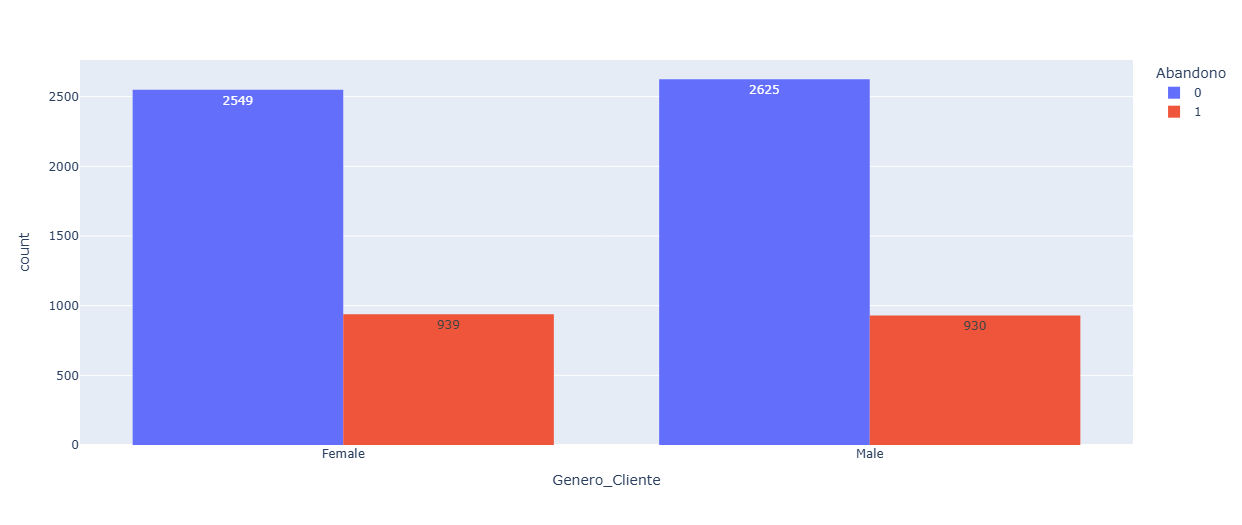

La tasa de abandono es ligeramente mayor en mujeres, pero no de forma significativa.

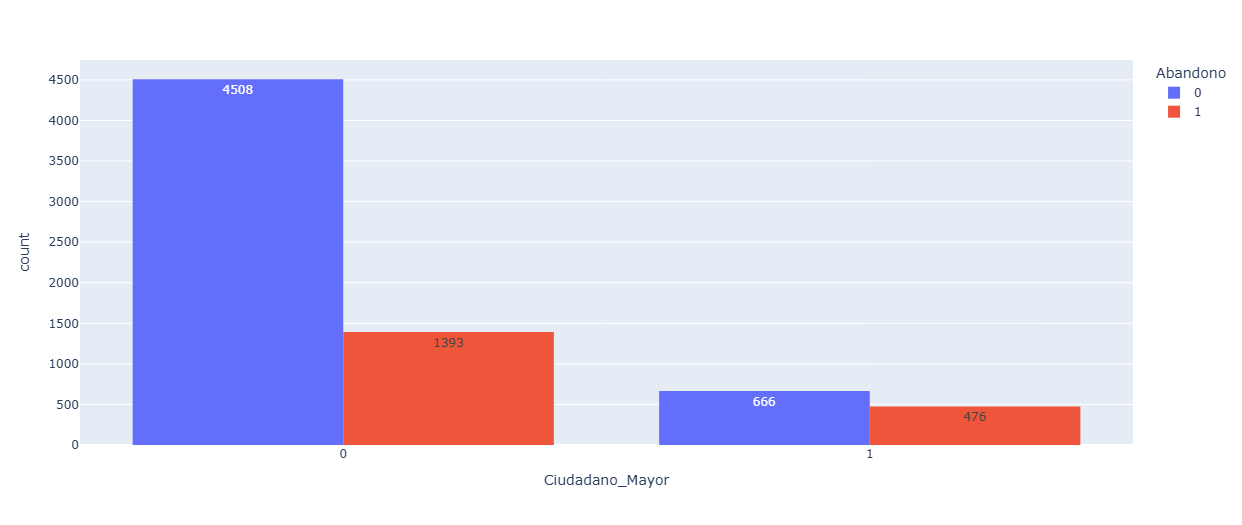


Los ciudadanos mayores de 65 años tienen una tasa de abandono considerablemente más alta que el resto de los clientes



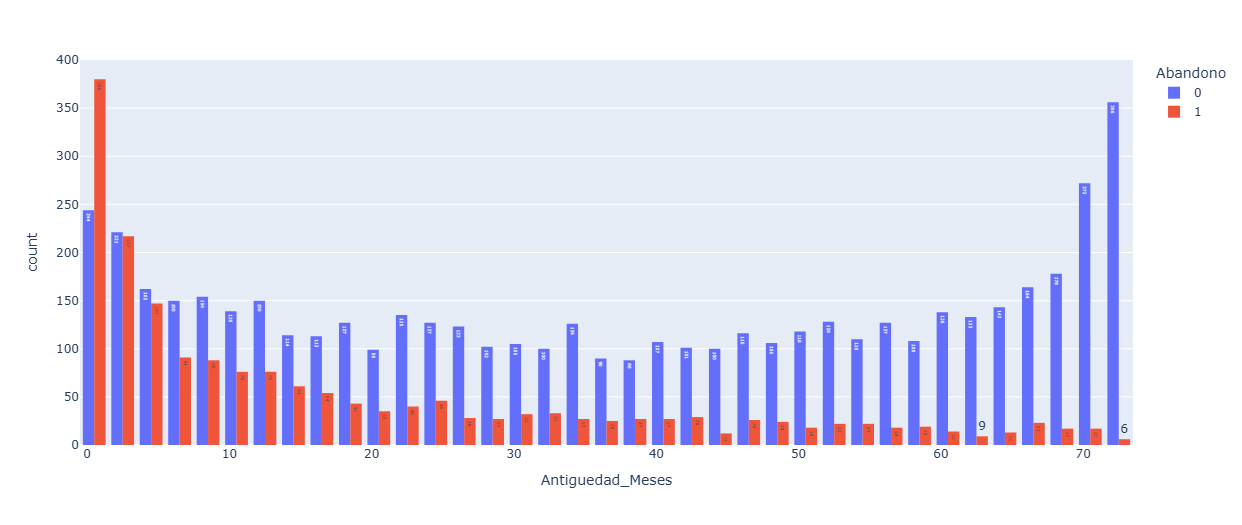


La antigüedad influye en el comportamiento de abandono de los clientes.



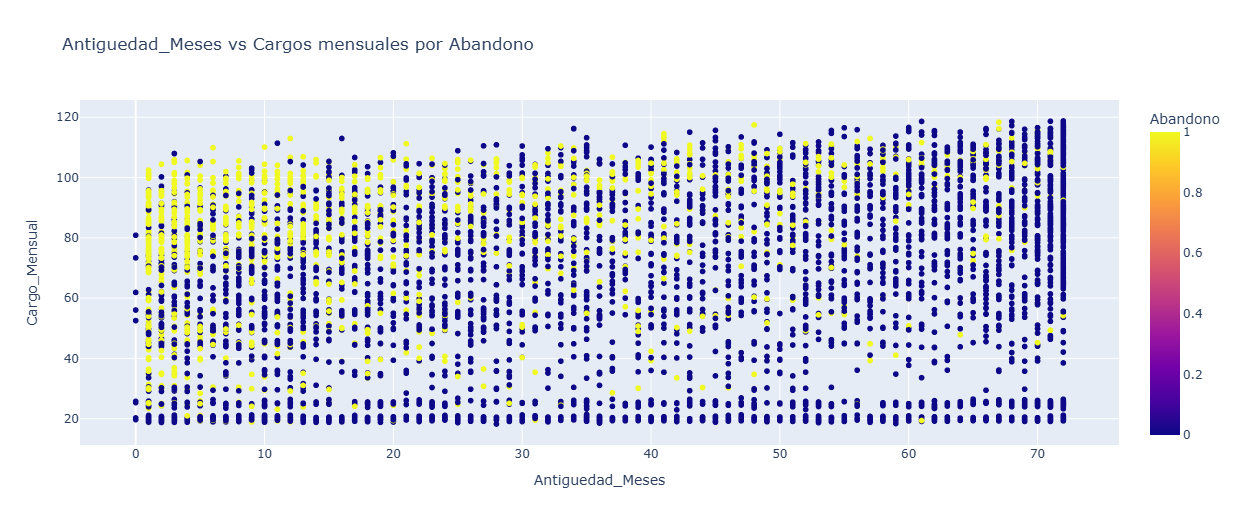


Clientes nuevos con cargos altos abandonan con más frecuencia.

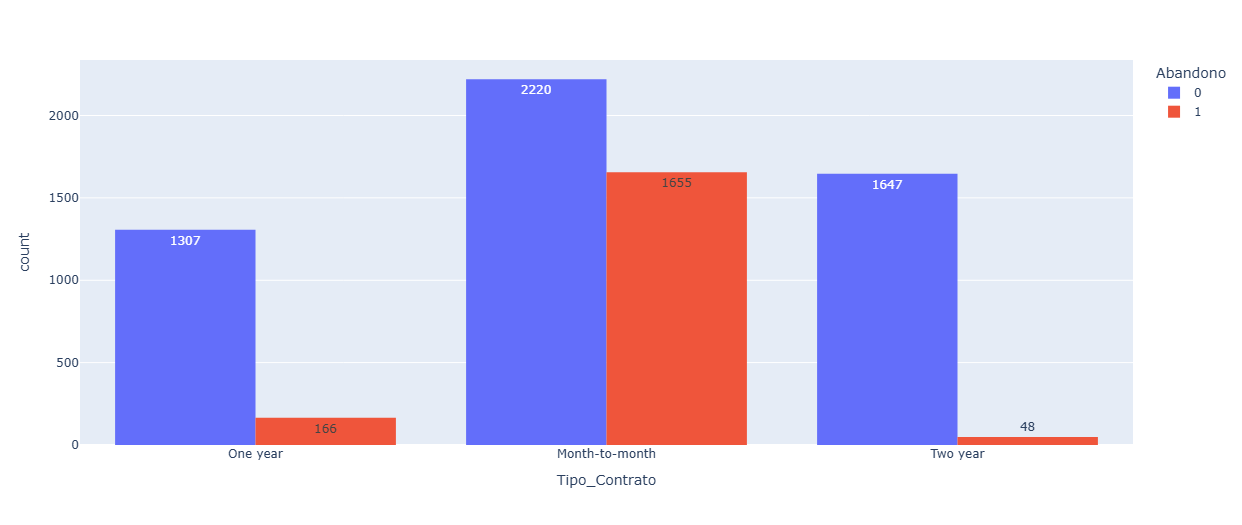

Los contratos "Mes a Mes" tienen la mayor tasa de abandono


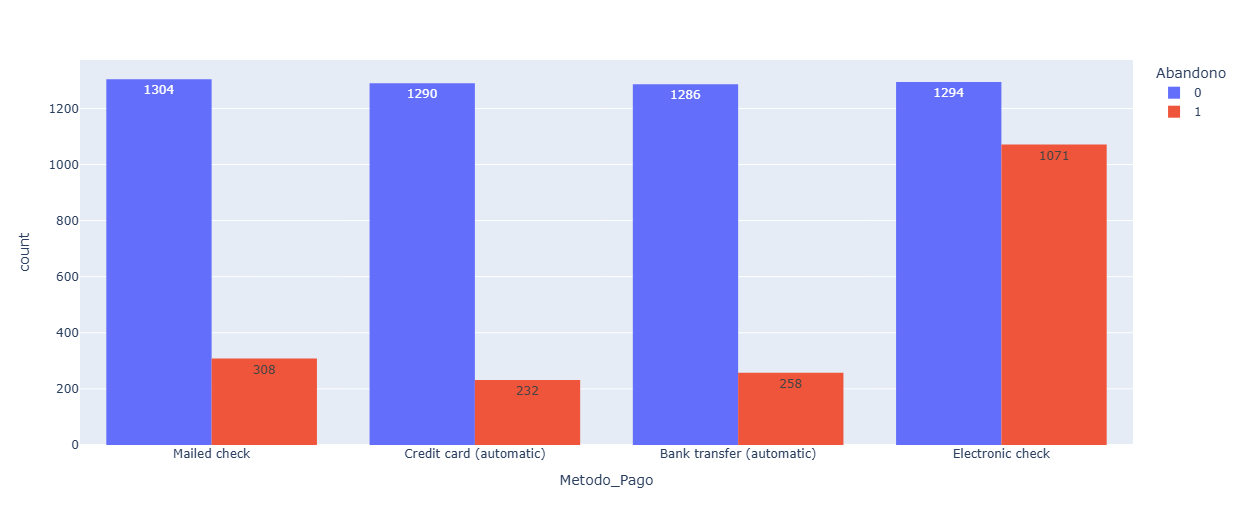

Los clientes que pagan con Electronic Check tienen una altísima probabilidad de abandonar.


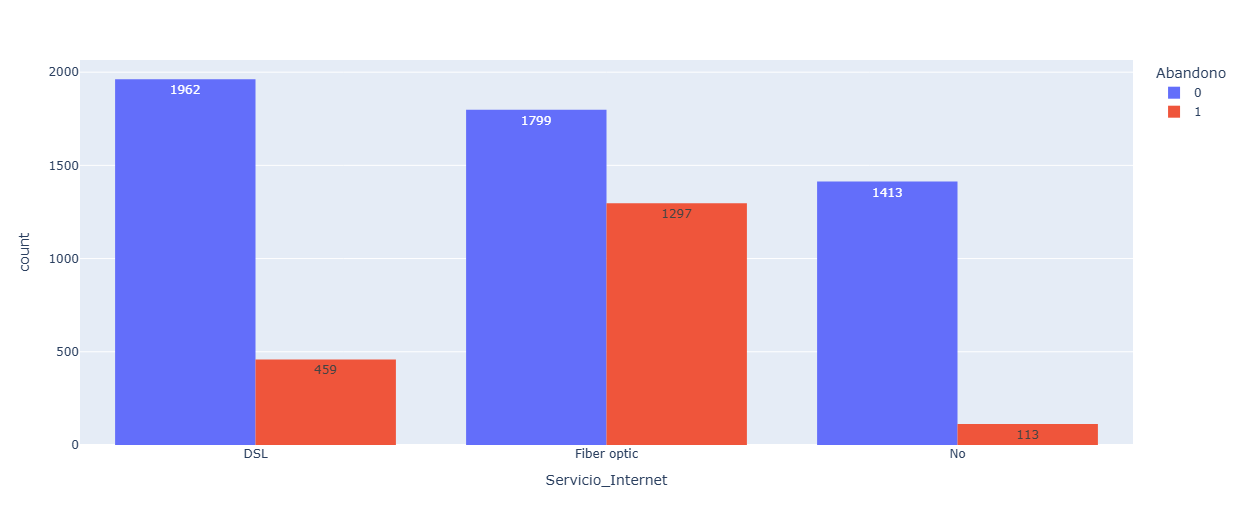


La fibra óptica está fuertemente asociada al abandono





•	Agrupar las colmunas Antigedad_Meses y Abandono para calcular el porcentaje de abandono de los clientes   groupby(['Antiguedad_Meses', 'Abandono'])

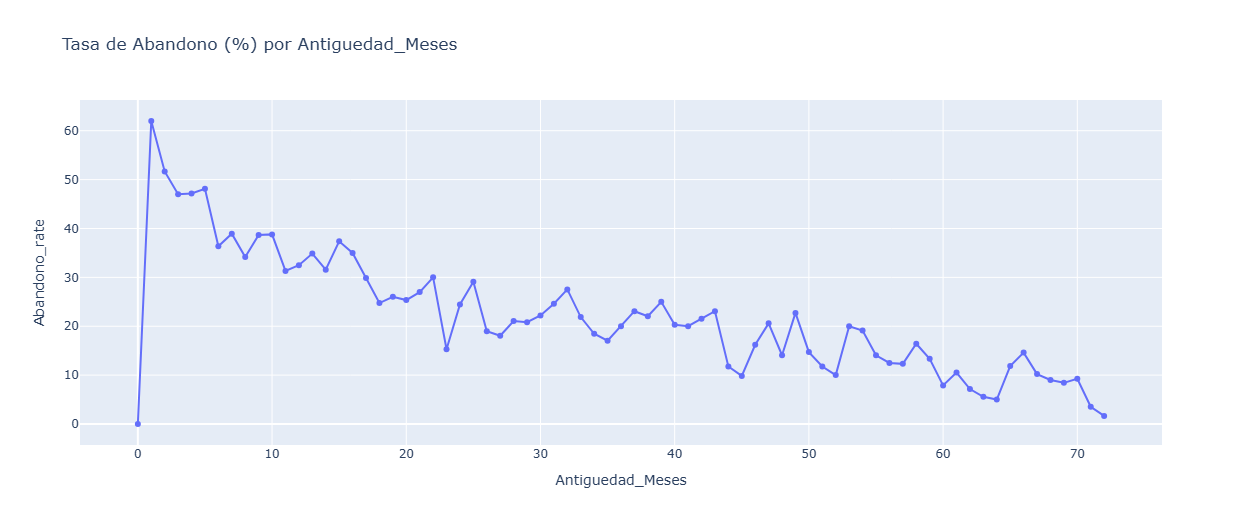


##🔹 Conclusiones e Insights:

•	El abandono está distribuido casi equitativamente entre hombres y mujeres, el género no es un factor determinante del abandono por sí solo. La tasa de abandono es ligeramente mayor en mujeres, pero no de forma significativa.

•	Los ciudadanos mayores de 65 años tienen una tasa de abandono considerablemente más alta que el resto de los clientes, los clientes mayores podrían tener más dificultades con el servicio (tecnología, accesibilidad, atención), podrían estar menos comprometidos o simplemente usar el servicio por menos tiempo. Puede haber factores externos como salud, movilidad o ingresos fijos que influyan.

•	La antigüedad influye en el comportamiento de abandono de los clientes. Los clientes con baja antigüedad (los primeros meses después de adquirir el servicio) tienen una tasa de abandono significativamente más alta que los clientes con mayor antigüedad. A medida que los clientes permanecen más tiempo, su probabilidad de abandono tiende a disminuir.

•	Los contratos "Mes a Mes" tienen la mayor tasa de abandono, los contratos de 1 año retienen mejor, aunque siguen mostrando algo de abandono y los contratos de 2 años son los más estables, con una tasa de abandono prácticamente nula.

•	Los clientes que pagan con Electronic Check tienen una altísima probabilidad de abandonar. Los métodos de pago como tarjeta de crédito y transferencia bancaria, sobre todo si son automáticos, están asociados a una mayor retención.

•	La mayoría de los abandonos ocurren durante los primeros meses de permanencia. Clientes nuevos con cargos altos abandonan con más frecuencia. Es probable que perciban un bajo valor en relación al precio. Clientes con mayor antigüedad permanecen, incluso si pagan más. Esto indica fidelización y/o satisfacción con el servicio.

•	La fibra óptica está fuertemente asociada al abandono, ya sea por expectativas altas o problemas técnicos, necesita atención prioritaria.



##🔹 Recomendaciones:

•	Programas de acompañamiento para adultos mayores.

•	Atención al cliente especializada o simplificación del servicio.

•	Campañas de retención específicas.

•	Diseñar un programa de bienvenida personalizado para nuevos clientes e implementar un seguimiento activo en los primeros 1-3 meses.

•	Incentivar los contratos anuales o bianuales (descuentos, beneficios exclusivos), monitorear de cerca a los clientes "Mes a Mes", especialmente en los primeros 1-3 meses, diseñar campañas de fidelización para convertir clientes de corto plazo a largo plazo.

•	Fomentar métodos de pago automáticos, Incentivar a los usuarios de Electronic Check a cambiar a transferencia o tarjeta.

•	Ofrecer descuentos o planes progresivos para nuevos usuarios con precios altos.
